In [8]:
import pi
from graphs import graph_bitcoin, graph_bridge, graph_karate_club
from metrics import ConvergenceTime, NodeVisits, DistanceFromStartNode
from scipy.ndimage import uniform_filter1d
from simulation import Simulation
import matplotlib.pyplot as plt

In [2]:
karate = graph_karate_club()

  0%|          | 0/10000 [00:00<?, ?it/s]/Users/pwojtyczek/private/random-walks-dynamics/simulation.py:28: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  self.A = nx.adjacency_matrix(graph).toarray()
 98%|█████████▊| 9776/10000 [00:04<00:00, 2360.53it/s]

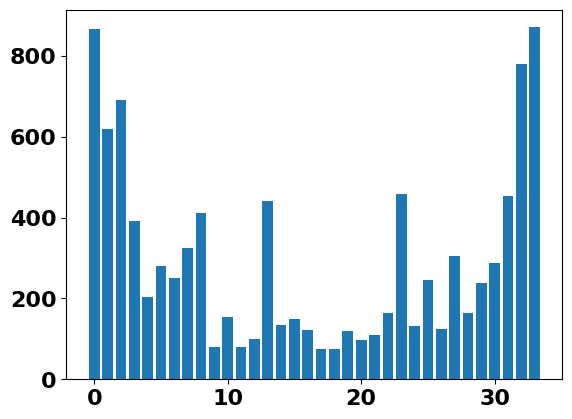

In [3]:
sim = Simulation(
    karate,
    pi.uniform(karate),
    graph_name='karate_uniform',
    metrics={'NodeVisits': NodeVisits}
).run()

node_visits = sim.metrics['NodeVisits']

plt.bar(list(node_visits.heatmap.keys()), node_visits.heatmap.values())
plt.show()

Bitcoin graph: Graph with 3783 nodes and 14124 edges
Selected subgraph: Graph with 439 nodes and 3190 edges




  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 37/10000 [00:00<00:27, 366.06it/s]

  1%|          | 74/10000 [00:00<00:29, 330.93it/s]

  1%|          | 113/10000 [00:00<00:27, 355.44it/s]

  1%|▏         | 149/10000 [00:00<00:27, 354.67it/s]

  2%|▏         | 189/10000 [00:00<00:26, 369.50it/s]

  2%|▏         | 232/10000 [00:00<00:25, 387.74it/s]

  3%|▎         | 272/10000 [00:00<00:24, 389.13it/s]

  3%|▎         | 313/10000 [00:00<00:24, 393.91it/s]

  4%|▎         | 357/10000 [00:00<00:23, 407.07it/s]

  4%|▍         | 399/10000 [00:01<00:23, 409.77it/s]

  4%|▍         | 441/10000 [00:01<00:24, 384.55it/s]

  5%|▍         | 480/10000 [00:01<00:25, 367.14it/s]

  5%|▌         | 522/10000 [00:01<00:24, 380.19it/s]

  6%|▌         | 565/10000 [00:01<00:24, 392.76it/s]

  6%|▌         | 605/10000 [00:01<00:24, 390.98it/s]

  6%|▋         | 648/10000 [00:01<00:23, 402.17it/s]

  7%|▋         | 689/10000 [00:01<00:23, 400.75it/s]

  7%|▋         | 733/10000 [00:01<00:22

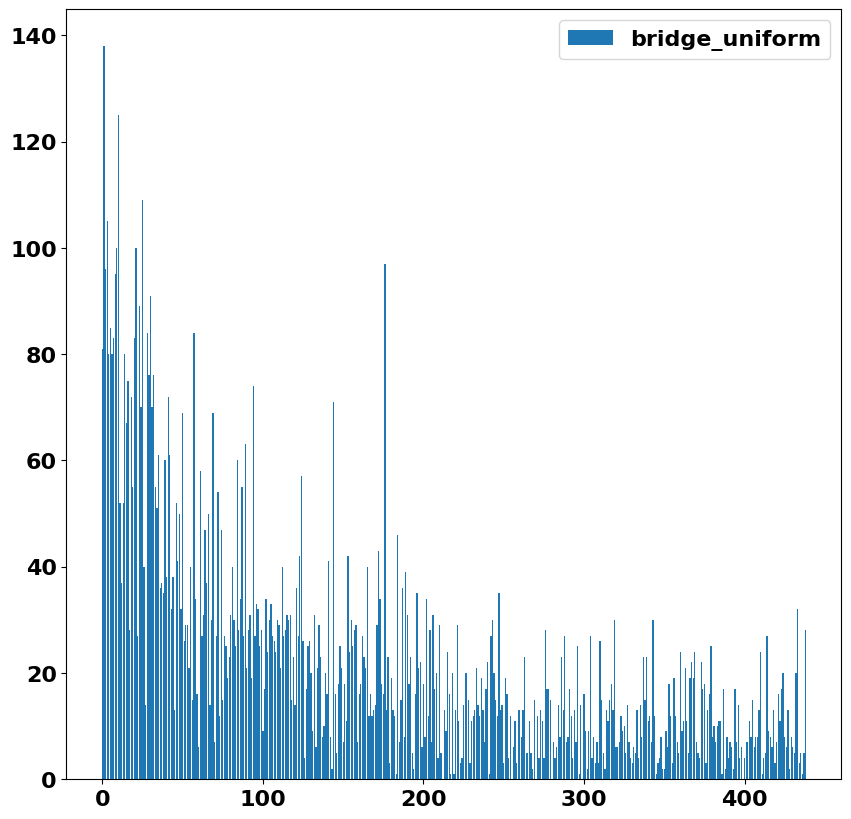

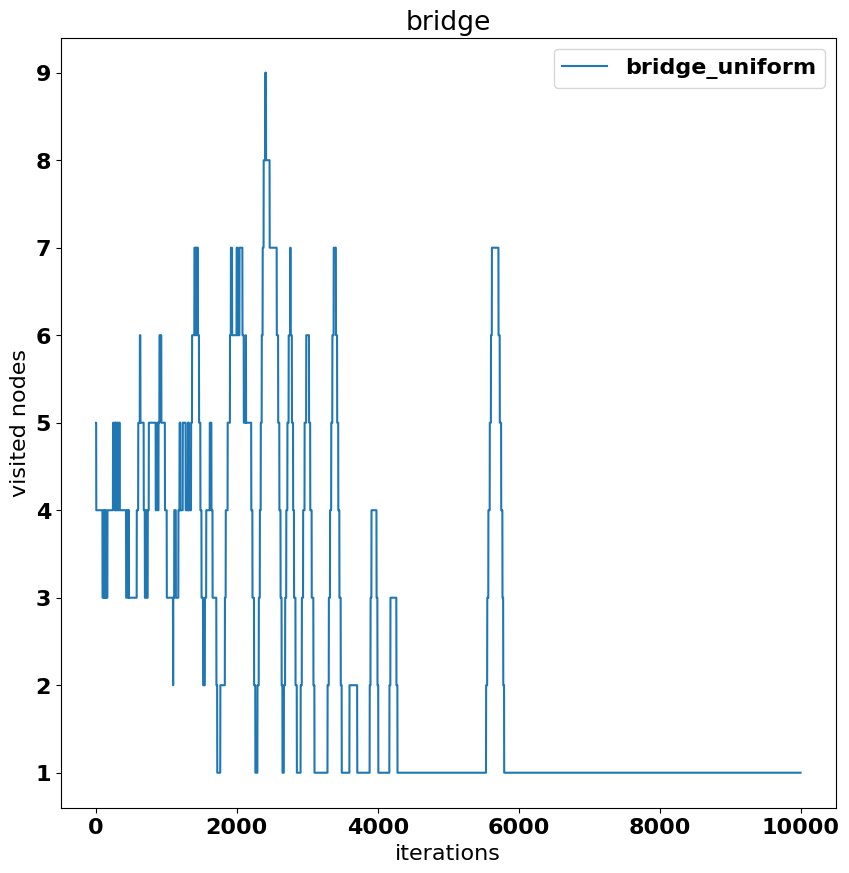

In [10]:
for graph, graph_name in [(graph_bridge(250), 'bridge')]:
    sims = [
        Simulation(
            graph,
            pi.uniform(graph),
            graph_name=f'{graph_name}_uniform',
            metrics={'ConvergenceTime': ConvergenceTime, 'NodeVisits': NodeVisits, 'Distance': DistanceFromStartNode}
        ),
        # Simulation(
        #     graph,
        #     pi.proportional_to_node_degree(graph),
        #     graph_name=f'{graph_name}_proportional_to_node_degree',
        #     metrics={'ConvergenceTime': ConvergenceTime, 'NodeVisits': NodeVisits}
        # ),
        # Simulation(
        #     graph,
        #     pi.inversely_proportional_to_node_degree(graph),
        #     graph_name=f'{graph_name}_inversely_proportional_to_node_degree',
        #     metrics={'ConvergenceTime': ConvergenceTime, 'NodeVisits': NodeVisits}
        # )
    ]
    
    for sim in sims:
        sim.run()
    
    plt.figure(figsize=(10, 10))
    for sim in sims:
        node_visits = sim.metrics['NodeVisits']
        plt.bar(list(node_visits.heatmap.keys()), node_visits.heatmap.values(), label=sim.graph_name)
    
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10, 10))
    max_xs = []
    N = 0
    for sim in sims:
        N = sim.N
        convergence_time = sim.metrics['Distance']
        
        if len(convergence_time.xs) > len(max_xs):
            max_xs = convergence_time.xs

        ys = uniform_filter1d(convergence_time.ys, size=100)
        plt.plot(convergence_time.xs, ys, label=sim.graph_name)
    
    # plt.plot(max_xs, [N] * len(max_xs), label='total nodes',
    #     linewidth=3, linestyle='--')
    
    plt.xlabel('iterations')
    plt.ylabel('visited nodes')
    plt.title(f'{graph_name}')
    plt.legend()
    plt.show()